In [1]:
import matplotlib.pyplot as plt      
from mpl_toolkits import mplot3d
import os
import sys
import glob
import time
import shutil
import gym
from gym import error, spaces, utils
import numpy as np
import math
from pathlib import Path

In [2]:
import gym_fish

In [3]:
from gym_fish.envs.lib import pyflare as fl

In [4]:
Experiment_name = '30 degree servo control TWO_WAY mass10 2_30 WP 1.0 wr 0.0 wa0.0'
Experiment_note = "change rotation reward"

In [5]:
os.chdir(Path(os.getcwd()+"/../").resolve())
print(os.getcwd())

/root/FishEnvPy/rl_test_new


### Import Settings

In [6]:
cwd = os.getcwd()+"/"
data_folder =cwd+ 'py_data/'
json_folder =data_folder+'jsons/'
path_folder =json_folder+'paths/'
scripts_folder = cwd+'scripts/'

In [7]:
fluid_json = json_folder+'fluid_param_0.5.json'
rigid_json = json_folder+'rigids_2_30.json'
path_json = str(Path("./py_data/jsons/paths/line.json").resolve())
print(fluid_json)
print(rigid_json)
print(path_json)

/root/FishEnvPy/rl_test_new/py_data/jsons/fluid_param_0.5.json
/root/FishEnvPy/rl_test_new/py_data/jsons/rigids_2_30.json
/root/FishEnvPy/rl_test_new/py_data/jsons/paths/line.json


In [8]:
def plot_infos(infos,title,reward_fig_name):
    dd = {k:[] for k in infos[0].keys()}
    for info in infos:
        for k in info.keys():
            dd[k].append(info[k])
    plt.figure()
    for k in dd.keys():
        if k=='action_penality':
            plt.plot(np.arange(0,len(dd[k])),[kkk  for kkk in dd[k]],label=k)
        else:
            plt.plot(np.arange(0,len(dd[k])),dd[k],label=k)
    plt.legend()
    plt.title(title)
    plt.savefig(reward_fig_name)
    plt.show()

### Output Settings

In [9]:
store_folder_name = time.strftime('%Y-%m-%d/',time.localtime(time.time()))+Experiment_name+'_'+time.strftime('%Y-%m-%d %H:%M/',time.localtime(time.time()))
imgs_folder_name = 'imgs/'
rl_data_folder_name = 'rl_data/'
rl_data_all_name='collected_o_a.npz'
network_folder_name = 'networks/'
store_folder = cwd+'output_data/'+store_folder_name
imgs_folder = store_folder+imgs_folder_name
rl_data_folder= store_folder+rl_data_folder_name
network_folder = store_folder+network_folder_name

if not os.path.exists(store_folder):
    os.makedirs(store_folder)
if not os.path.exists(imgs_folder):
    os.makedirs(imgs_folder)
if not os.path.exists(rl_data_folder):
    os.makedirs(rl_data_folder)
if not os.path.exists(network_folder):
    os.makedirs(network_folder)

## Saving sources

In [10]:
save_sources = True
sources_folder_name = ['py_data','scripts']
if save_sources==True:
    for fn in sources_folder_name:
        shutil.copytree(cwd+fn,store_folder+'sources/'+fn)
with open(store_folder+'note.txt','w+') as f:
    f.write(time.strftime('%Y-%m-%d %H:%M\n',time.localtime(time.time())))
    f.write(Experiment_note)

### RL_TRAINING Setup

In [11]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2
from stable_baselines.common.vec_env import DummyVecEnv, VecCheckNan,VecNormalize

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



## RL Begin

In [12]:
algo = 'PPO'
algofoler=algo+'/'
if not os.path.exists(network_folder+algofoler):
    os.makedirs(network_folder+algofoler)
if not os.path.exists(network_folder+algofoler+'imgs/'):
    os.makedirs(network_folder+algofoler+'imgs/')
if not os.path.exists(network_folder+algofoler+'imgs/trajs/'):
    os.makedirs(network_folder+algofoler+'imgs/trajs/')
if not os.path.exists(network_folder+algofoler+'imgs/rewards/'):
    os.makedirs(network_folder+algofoler+'imgs/rewards/')
if not os.path.exists(network_folder+algofoler+'models/'):
    os.makedirs(network_folder+algofoler+'models/')

In [13]:
from gym_fish.envs import FishEnv
env = make_vec_env(FishEnv, 
                   n_envs=1,
                   env_kwargs={
                       'gpuId':1,
                       'path_json':path_json,
                       'couple_mode':fl.COUPLE_MODE.EMPIRICAL,
                        'theta': 30,"frame_skip":100,
                       'fluid_json':fluid_json,"wp":1.0,"wr":0.0,"wa":0.0,
                       'rigid_json':rigid_json,
                       
                   })
# env = VecNormalize(env, norm_obs=False, norm_reward=False)
env_test=gym.make('fish-v0', 
                  gpuId=1,
                       path_json=path_json,
                        couple_mode= fl.COUPLE_MODE.EMPIRICAL,
                         theta = 30,frame_skip=100,
                       fluid_json=fluid_json,wp=1.0,wr=0.0,wa=0.0,
                       rigid_json=rigid_json,
                   )


1
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
1
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]


In [14]:

policy_kwargs = None
model = PPO2(MlpPolicy, 
             env, 
            n_steps=64,
             verbose=1,
             tensorboard_log=network_folder+algofoler,
            )





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





In [15]:
def evaluate_env(env_test,model,title,traj_fig_name,reward_fig_name,save=False,eval_trajs=3,render=False):
    
    obs = env_test.reset()
    dones = False
    infos = []
    reward = 0
    while not dones:
        action, _states = model.predict(obs, deterministic=True)
        if not save:
            obs, r, dones,info=env_test.step(action)
        else:
            obs, r, dones,info=env_test.stepSave(action,save_fluid=True)
        if render:
            env_test.render()
        reward=reward+r
        infos.append(info)
    plot_infos(infos,title=title,reward_fig_name=reward_fig_name)
    env_test.plot3d(title=title,fig_name = traj_fig_name)
    
    rewards= [reward]
    for i in range(eval_trajs-1):
        obs = env_test.reset()
        dones = False
        reward=0
        while not dones:
            action, _states = model.predict(obs, deterministic=True)
            obs, r, dones,_=env_test.step(action)
            reward=reward+r
        rewards.append(reward)
    print(np.mean(rewards))
    return np.mean(rewards)

### RL Train

In [16]:
timesteps = int(1e6)
step = int(1e3)
length =int(timesteps/step) 
print(timesteps,step,length)
last_best_reward = -1e5
cur_steps = 0

1000000 1000 1000



1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]

--------------------------------------
| approxkl           | 7.192633e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 51            |
| ep_reward_mean     | 12            |
| explained_variance | 0.0232        |
| fps                | 1             |
| n_updates          | 1             |
| policy_entropy     | 1.4179682     |
| policy_loss        | -0.0019837432 |
| serial_timesteps   | 64            |
| time_elapsed       | 0.000136      |
| total_timesteps    | 64            |
| value_loss         | 3.9525397     |
--------------------------------------
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.0002

1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
--------------------------------------
| approxkl           | 0.00043736625 |
| clipfrac           | 0.0           |
| ep_len_mean        | 51            |
| ep_reward_mean     | 11.2          |
| explained_variance | -0.231        |
| fps                | 1             |
| n_updates          | 11            |
| policy_entropy     | 1.4149141     |
| policy_loss        | -0.007803193  |
| serial_timesteps   | 704           |
| time_elapsed       | 374           |
| total_timesteps    | 704           |
| value_loss         | 1.1582338     |
--------------------------------------
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.000280

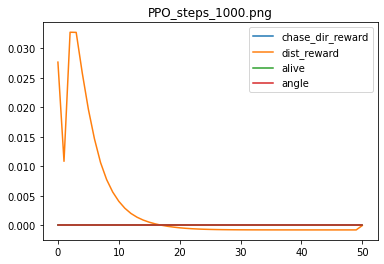

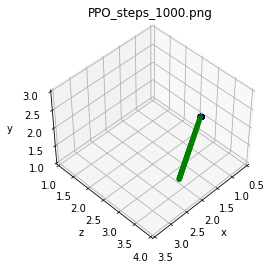

1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
0.178965871818761
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
--------------------------------------
| approxkl           | 8.7193264e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 50.6          |
| ep_reward_mean     | 10.2          |
| explained_variance | 0.00033       |
| fps                | 1             |
| n_updates          | 1             |
| policy_entropy     | 1.4113289     |
| policy_loss  

-------------------------------------
| approxkl           | 0.0011738853 |
| clipfrac           | 0.0078125    |
| ep_len_mean        | 50.8         |
| ep_reward_mean     | 10.7         |
| explained_variance | 0.131        |
| fps                | 1            |
| n_updates          | 11           |
| policy_entropy     | 1.4073473    |
| policy_loss        | -0.004991144 |
| serial_timesteps   | 704          |
| time_elapsed       | 377          |
| total_timesteps    | 1664         |
| value_loss         | 1.9032191    |
-------------------------------------
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
--------------------------------------
| approxkl           | 0.00025250245 |
| clipfrac           | 0.0           |
| ep_

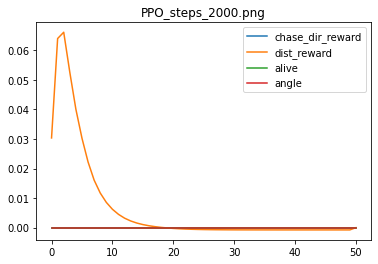

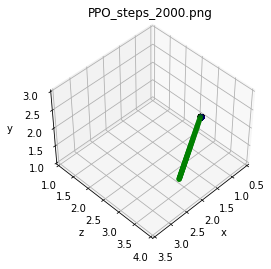

1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
0.3406502055578571
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
--------------------------------------
| approxkl           | 0.00028804794 |
| clipfrac           | 0.0           |
| ep_len_mean        | 50.8          |
| ep_reward_mean     | 11.1          |
| explained_variance | 0.274         |
| fps                | 1             |
| n_updates          | 1             |
| policy_entropy     | 1.4083002     |
| policy_loss 

1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
---------------------------------------
| approxkl           | 3.8640173e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 50.9           |
| ep_reward_mean     | 11.5           |
| explained_variance | 0.0502         |
| fps                | 1              |
| n_updates          | 11             |
| policy_entropy     | 1.4135703      |
| policy_loss        | -0.00039688568 |
| serial_timesteps   | 704            |
| time_elapsed       | 376            |
| total_timesteps    | 2624           |
| value_loss         | 2.5538788      |
---------------------------------------
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
-------------------------------------
| approxkl           | 0.0005526015 |
| clipfrac      

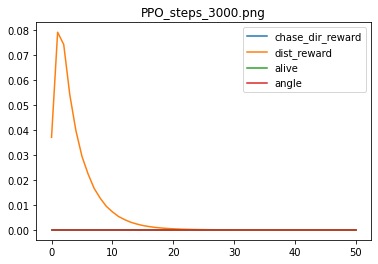

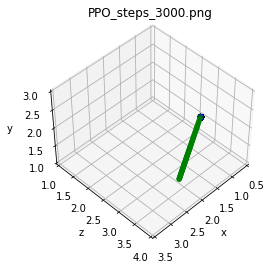

1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
0.40504858651456743
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
-------------------------------------
| approxkl           | 0.0010229992 |
| clipfrac           | 0.0          |
| ep_len_mean        | 50.9         |
| ep_reward_mean     | 11.7         |
| explained_variance | 0.504        |
| fps                | 1            |
| n_updates          | 1            |
| policy_entropy     | 1.4146714    |
| policy_loss        | -0.009022649 |
| serial_timesteps   | 64           |
| time_elapsed       | 0.000161     |
| total_timesteps    | 2944         |
| value_loss         | 2

[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
--------------------------------------
| approxkl           | 0.0005993683  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 50.9          |
| ep_reward_mean     | 12.1          |
| explained_variance | 0.949         |
| fps                | 1             |
| n_updates          | 11            |
| policy_entropy     | 1.4142998     |
| policy_loss        | -0.0029883094 |
| serial_timesteps   | 704           |
| time_elapsed       | 373           |
| total_timesteps    | 3584          |
| value_loss         | 0.50273824    |
--------------------------------------
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
-------------------------------------
| approxkl           | 0.0001005075 |
| clipfrac           | 0.0       

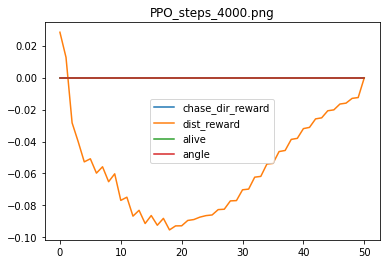

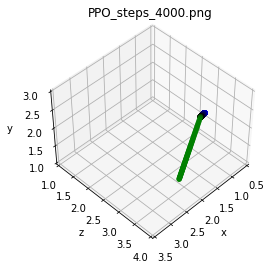

1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
-2.842706628254888
1
[0.97686249 2.00028078 2.99999994] [ 9.99980604e-01 -6.22825676e-03  2.04357705e-06] [2.7089133  2.00028078 3.99999994] [0.8660254 0.        0.5      ]
--------------------------------------
| approxkl           | 0.00026515473 |
| clipfrac           | 0.0           |
| ep_len_mean        | 50.9          |
| ep_reward_mean     | 12.2          |
| explained_variance | 0.937         |
| fps                | 1             |
| n_updates          | 1             |
| policy_entropy     | 1.4134398     |
| policy_loss        | 0.00299635    |
| serial_timesteps   | 64            |
| time_elapsed       | 0.000141      |
| total_timesteps    | 3904          |
| value_loss

In [ ]:
while cur_steps<timesteps:
    model.learn(total_timesteps=step, log_interval=1, reset_num_timesteps=False)
    cur_steps = cur_steps+step
    img_name =algo+ "_steps_{0}.png".format(cur_steps)
    model.save(network_folder+algofoler+'models/'+"_steps_{0}".format(cur_steps))
    rr = evaluate_env(env_test,model,title=img_name,traj_fig_name=network_folder+algofoler+'imgs/trajs/'+img_name,reward_fig_name=network_folder+algofoler+'imgs/rewards/'+img_name)
    if rr>last_best_reward:
        last_best_reward=rr
        model.save(network_folder+algofoler+'models/best')

In [ ]:
!./clean_visdata.sh

In [ ]:
model_test=PPO2.load(network_folder+algofoler+'models/best.zip')
evaluate_env(env_test,model_test,
             title="Best",
             traj_fig_name=network_folder+algofoler+'imgs/trajs/best.png',
             reward_fig_name=network_folder+algofoler+'imgs/rewards/best.png',
            render =False,
            save=True,eval_trajs=0
            )

In [ ]:
# evaluate_env(env_test,model,
#              title="converge",
#              traj_fig_name=network_folder+algofoler+'imgs/trajs/converge.png',
#              reward_fig_name=network_folder+algofoler+'imgs/rewards/converge.png',
#             render =False,
#             save=True,eval_trajs=0
#             )